In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [52]:
df = pd.read_csv('/content/drive/MyDrive/google colab/Assignment/Credit_card_fraud_detection/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [54]:
print("unique value in class festure",df['Class'].unique())
df['Class'].value_counts()

unique value in class festure [0 1]


Class
0    284315
1       492
Name: count, dtype: int64

In [55]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (227845, 30)
Shape of y_train =  (227845,)
Shape of X_test =  (56962, 30)
Shape of y_test =  (56962,)


In [79]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 399
Before OverSampling, counts of label '0': 227446 

After OverSampling, the shape of train_X: (454892, 30)
After OverSampling, the shape of train_y: (454892,) 

After OverSampling, counts of label '1': 227446
After OverSampling, counts of label '0': 227446


## **Feature Scaling**

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc =sc.fit_transform(X_train)
X_test_sc  =sc.fit_transform(X_test)

## **Logistic Regression**

In [82]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(class_weight='balanced',random_state=0, max_iter=1000)
model_1.fit(X_train_sc,y_train)
model_1.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9963484428215301

## **Decision Tree**

In [84]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.9981917769741231

## **Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=100,criterion='gini',)
model_3.fit(X_train,y_train)
model_3.score(X_test,y_test)

0.9995084442259752

## **Model Evaluation**

In [93]:
from sklearn.metrics import classification_report

In [87]:
models = [model_1, model_2, model_3]
models_name = ['Logistic Regression','Decision Tree', 'Random Forest']

In [88]:
models_classification_report = []
models_prediction = []
for model in models:
    y_pred = model.predict(X_test)
    models_prediction.append(y_pred)
    report = classification_report(y_test, y_pred)
    models_classification_report.append(report)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [89]:
for index in range(len(models_classification_report)):
    print("-----------------------------------------------------")
    print("\t\t\t",models_name[index])
    print(models_classification_report[index])
    print("\n\n\n")

-----------------------------------------------------
			 Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.00      0.00      0.00        93

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962





-----------------------------------------------------
			 Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.47      0.85      0.61        93

    accuracy                           1.00     56962
   macro avg       0.73      0.92      0.80     56962
weighted avg       1.00      1.00      1.00     56962





-----------------------------------------------------
			 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
       

		 Logistic Regression


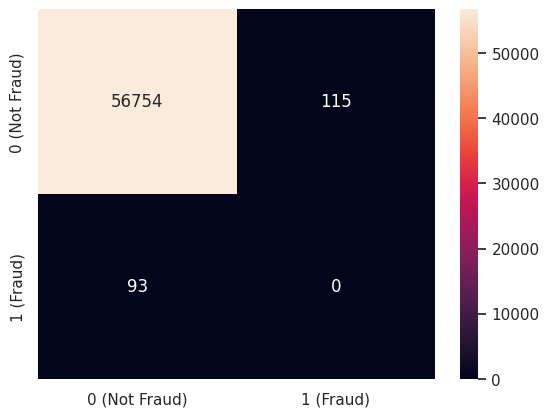




		 Decision Tree


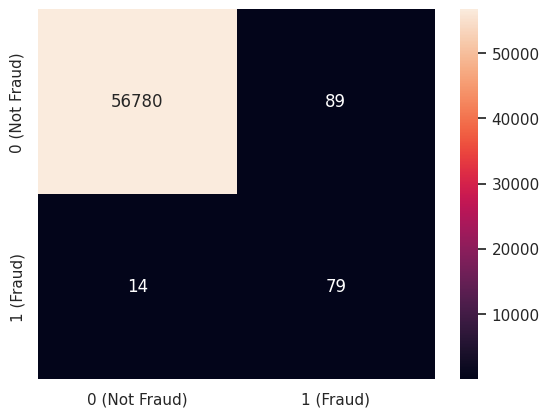




		 Random Forest


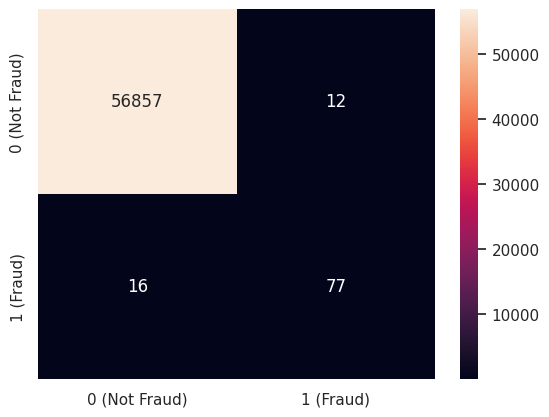

In [91]:
class_labels = ['0 (Not Fraud)','1 (Fraud)']
sns.set()
for index in range(len(models_prediction)):
    print("\t\t",models_name[index])
    cm = confusion_matrix(y_test, models_prediction[index])
    sns.heatmap(cm,annot=True,fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.show()
    print("\n\n")